# Sample solutions by MCMC instead of annealing

In [1]:
import joblib
import numpy as np
import seaborn as sns
import pandas as pd
import sys
sys.path.append("../lib")
from NumbaMCMC import  NumbaMCMC

In [2]:
qubo_path="data/rbm_J.bin"
qubo=joblib.load(qubo_path)

In [3]:
def plot_fp(mcmc, color="b", label="", c=1):
    pos = np.sum(mcmc.log, axis=1)
    E_list = np.array(mcmc.log_E).reshape(-1)/c
    df = pd.DataFrame([E_list, pos]).T
    df.columns = ["Energy", "Norm"]

    sns.scatterplot(
        data=df, x='Energy', y="Norm",
        alpha=0.5,
        color=color,
        label=label,
        s=5,
        # cbar=True
        hue=df.index,
    )

100%|██████████| 1000000/1000000 [00:03<00:00, 305402.38it/s]


CPU times: user 3.28 s, sys: 0 ns, total: 3.28 s
Wall time: 3.28 s


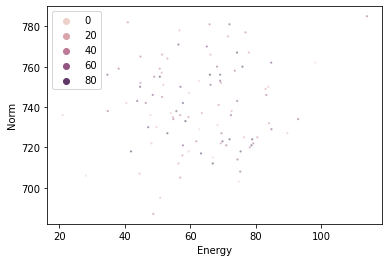

In [6]:
#run mcmc
steps = 10**6  # mcmc steps
c = 1          # scaling factor
mcmc=NumbaMCMC(-qubo*c,n_steps=steps,interval=10**4)
%time mcmc.run()
plot_fp(mcmc, color="b", label="", c=c)


In [7]:
joblib.dump([mcmc.log,np.array(mcmc.log_E).reshape(-1)/c],f"data/mcmc_c{c}.bin",compress=1)


['data/mcmc_c1.bin']